### Importing necessary packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the csv, parsing date and resetting the index

In [2]:
# Reading the file fcc forum page views assigning variable df
df = pd.read_csv('fcc-forum-pageviews.csv')

# Parsing the dates to be datetime type
df['date'] = pd.to_datetime(df['date'])

# Setting the index of the data frame to be date
df = df.set_index('date')

# Getting the first 10 values of the df
df.head(10)

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
2016-05-14,3127
2016-05-15,2927
2016-05-16,2591
2016-05-17,3403


### Filtering the df to obtain the top and bottom 2.5% of the values

In [3]:
# Filtering the top 2.5% of the values
top = df['value'] > df['value'].quantile(0.025)

# Filtering the bottom 2.5% of the values
bottom = df['value'] < df['value'].quantile(0.975)

# Combining filtered top and bottom values to a new df
df = df[top & bottom]

# The filtered df can be obtained using the slice below
# df.loc['2016-05-09':'2019-12-03']
df.head()

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


### Drawing a line plot using matplotlib

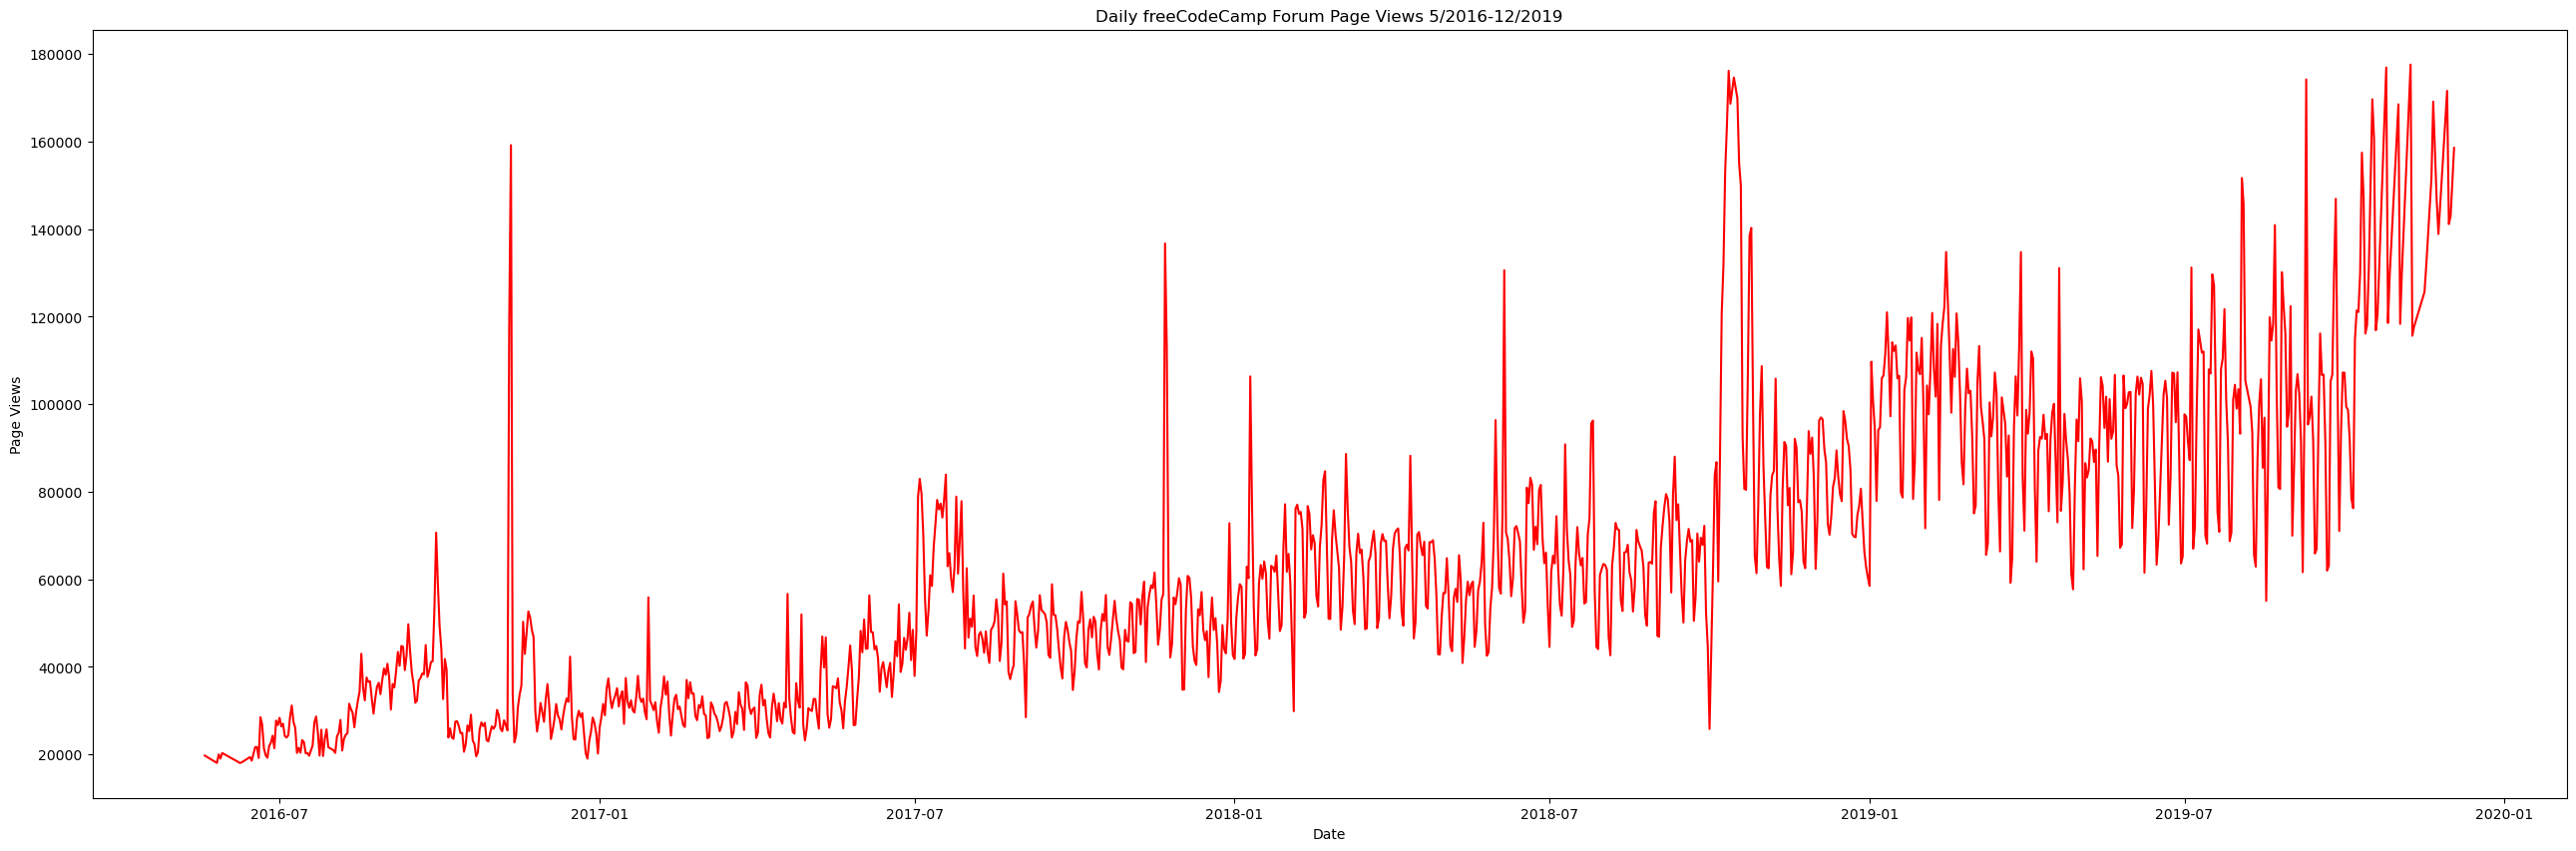

In [4]:
plt.figure(figsize = (32,10),dpi = 100)
plt.plot(df,color = 'red')
plt.xlabel('Date')
plt.ylabel('Page Views')
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
plt.show()

### Preparing data for the bar plot

In [5]:
df_bar = df.copy()

df_bar['Years'] = df_bar.index.year
df_bar['Months'] = df_bar.index.month_name()

df_bar = pd.DataFrame(df_bar.groupby(["Years","Months"],sort = False)["value"].mean().round().astype(int))

df_bar = df_bar.rename(columns={"value": "Average Page Views"})
df_bar = df_bar.reset_index()

df_bar.head()

,Years,Months,Average Page Views
0,2016,May,19432
1,2016,June,21875
2,2016,July,24110
3,2016,August,31049
4,2016,September,41477


### Preparing bar plot data

In [6]:
missing_data = {"Years": [2016, 2016, 2016, 2016],
                "Months": ['January', 'February', 'March', 'April'],
                "Average Page Views": [0, 0, 0, 0]}


df_bar = pd.concat([pd.DataFrame(missing_data) , df_bar])
df_bar.head()

,Years,Months,Average Page Views
0,2016,January,0
1,2016,February,0
2,2016,March,0
3,2016,April,0
0,2016,May,19432


### Drawing bar plots using seaborn

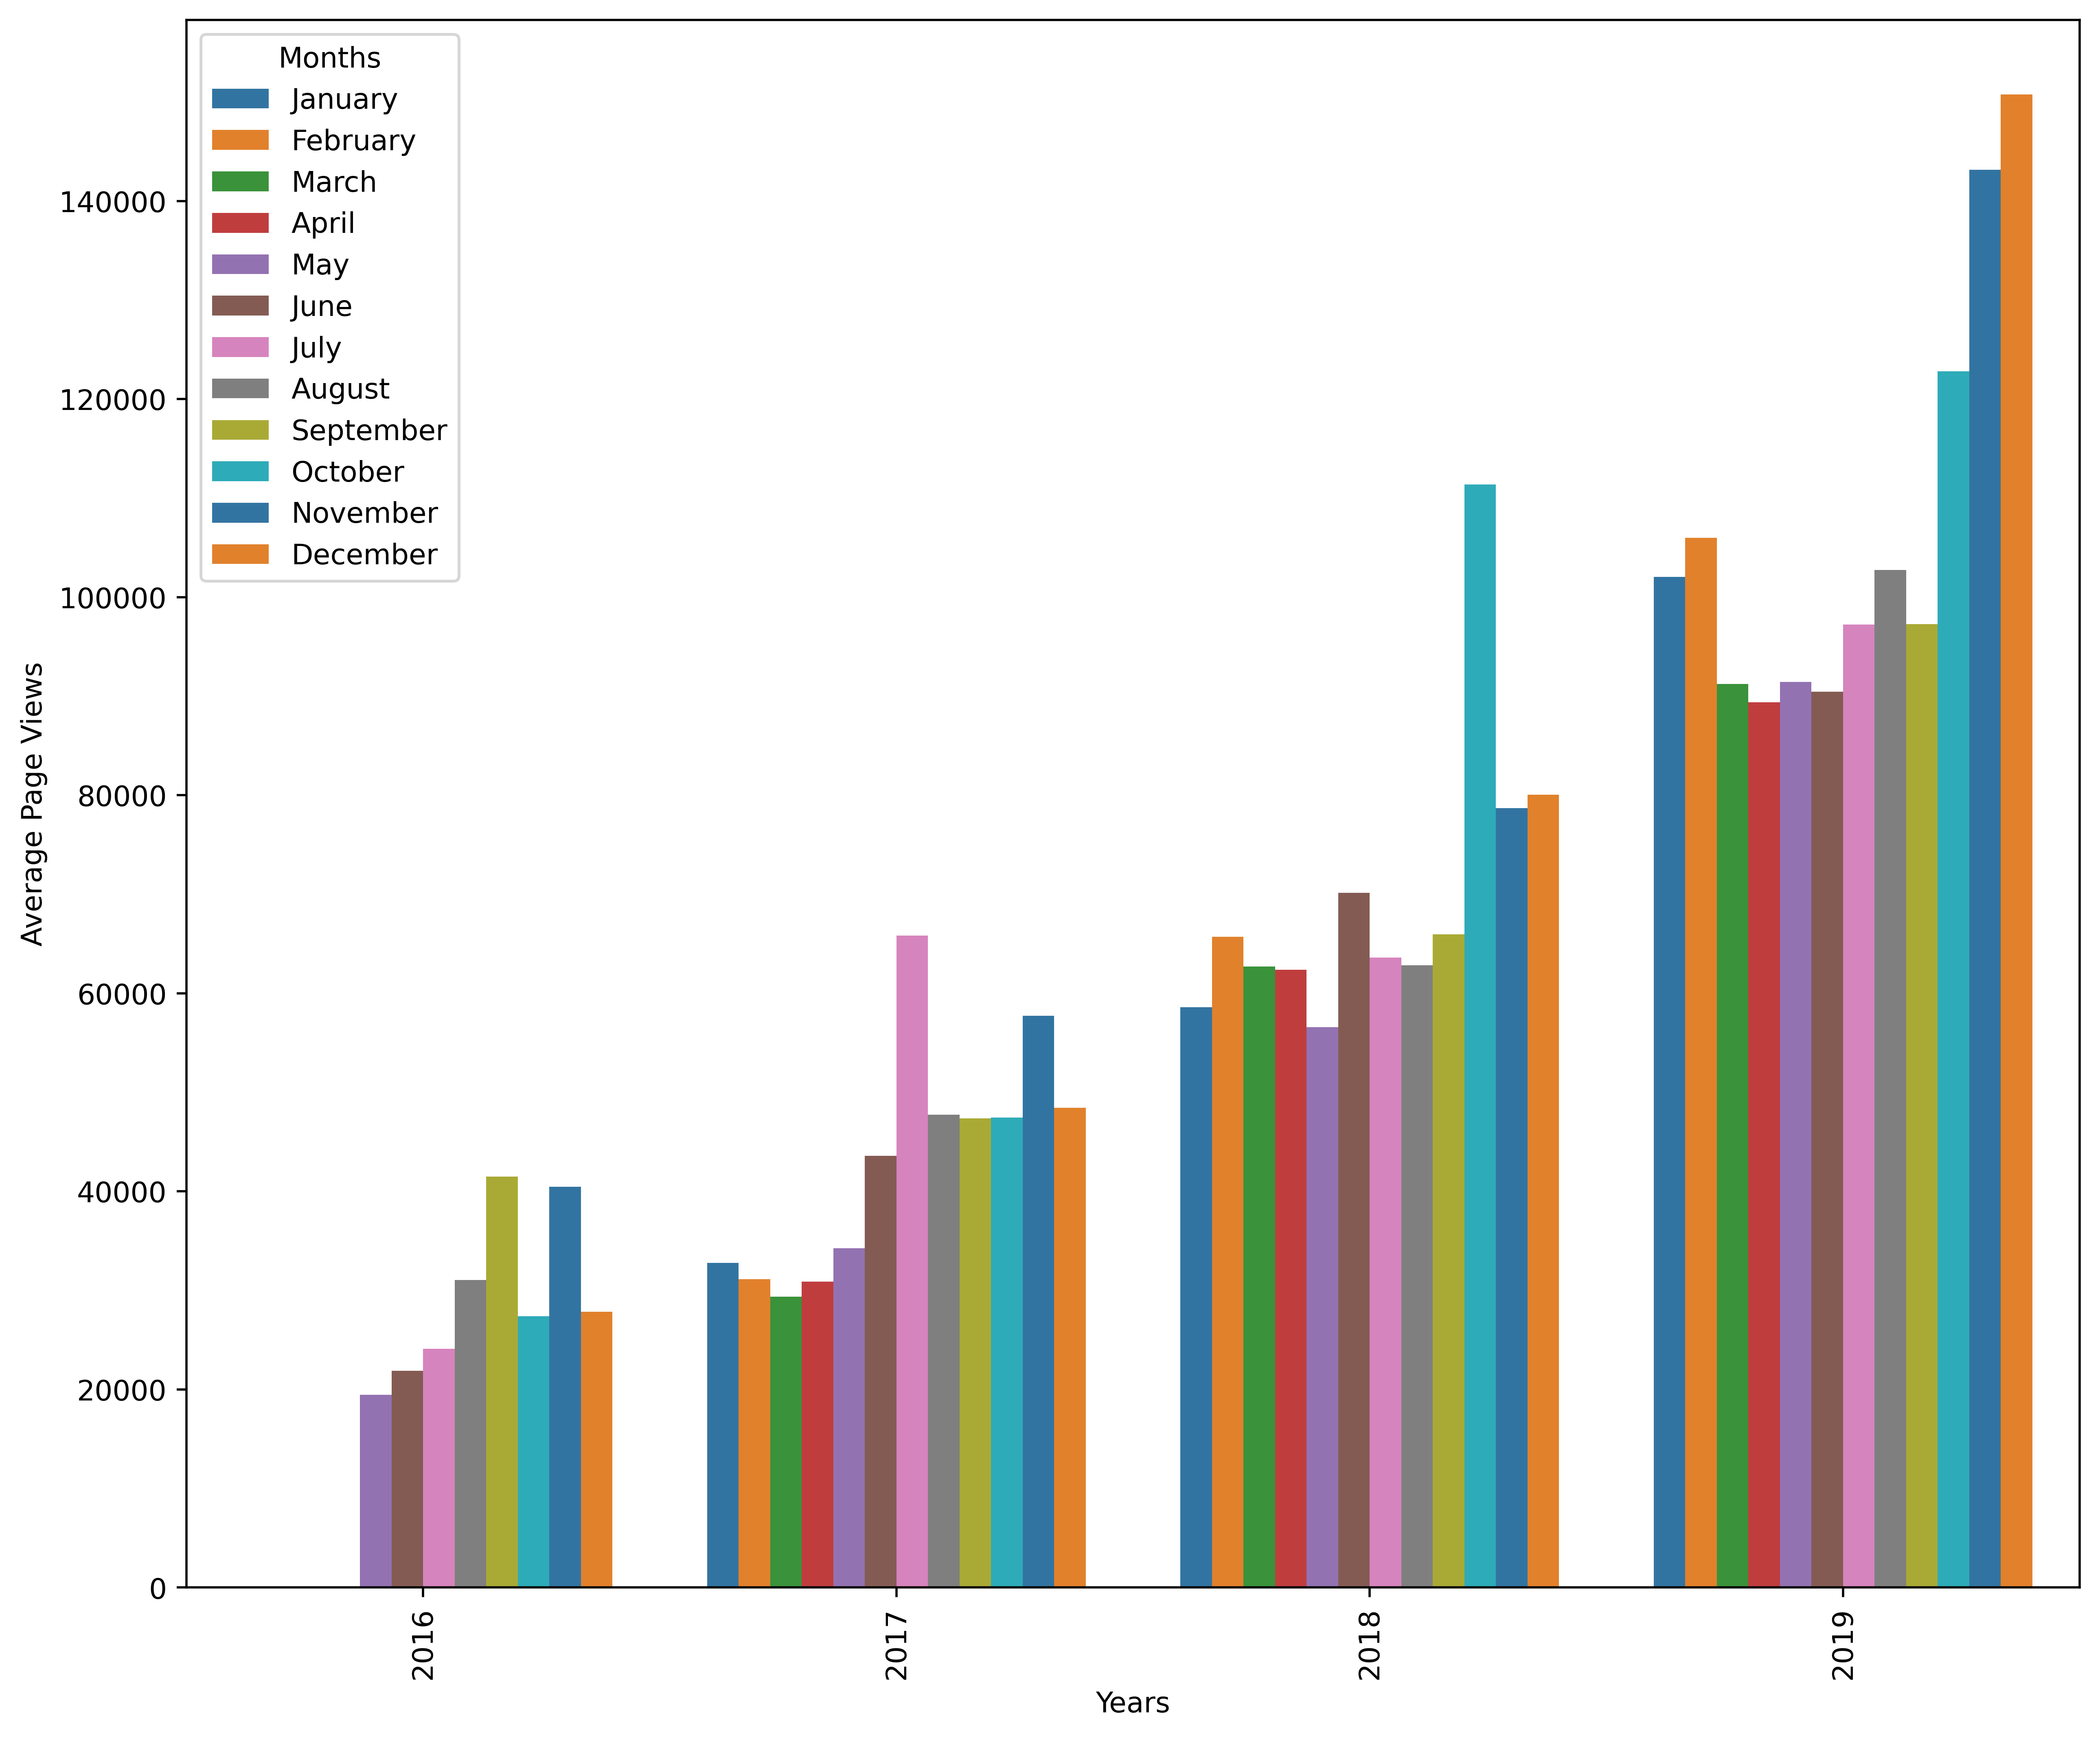

In [7]:
plt.figure(figsize = (12,10),dpi = 500)

sns.barplot(df_bar, x = 'Years', y = 'Average Page Views', hue = 'Months',palette = 'tab10')
plt.xticks(rotation = 90)
plt.show()

### Preparing box plot data

In [8]:
df_box = df.copy()
df_box.reset_index(inplace = True)
df_box['Year'] = [x.year for x in df_box.date]
df_box['Month'] = [x.strftime('%b') for x in df_box.date]
df_box

,date,value,Year,Month
0,2016-05-19,19736,2016,May
1,2016-05-26,18060,2016,May
2,2016-05-27,19997,2016,May
3,2016-05-28,19044,2016,May
4,2016-05-29,20325,2016,May
...,...,...,...,...
1233,2019-11-24,138875,2019,Nov
1234,2019-11-29,171584,2019,Nov
1235,2019-11-30,141161,2019,Nov
1236,2019-12-01,142918,2019,Dec


### Drawing box plots using seaborn

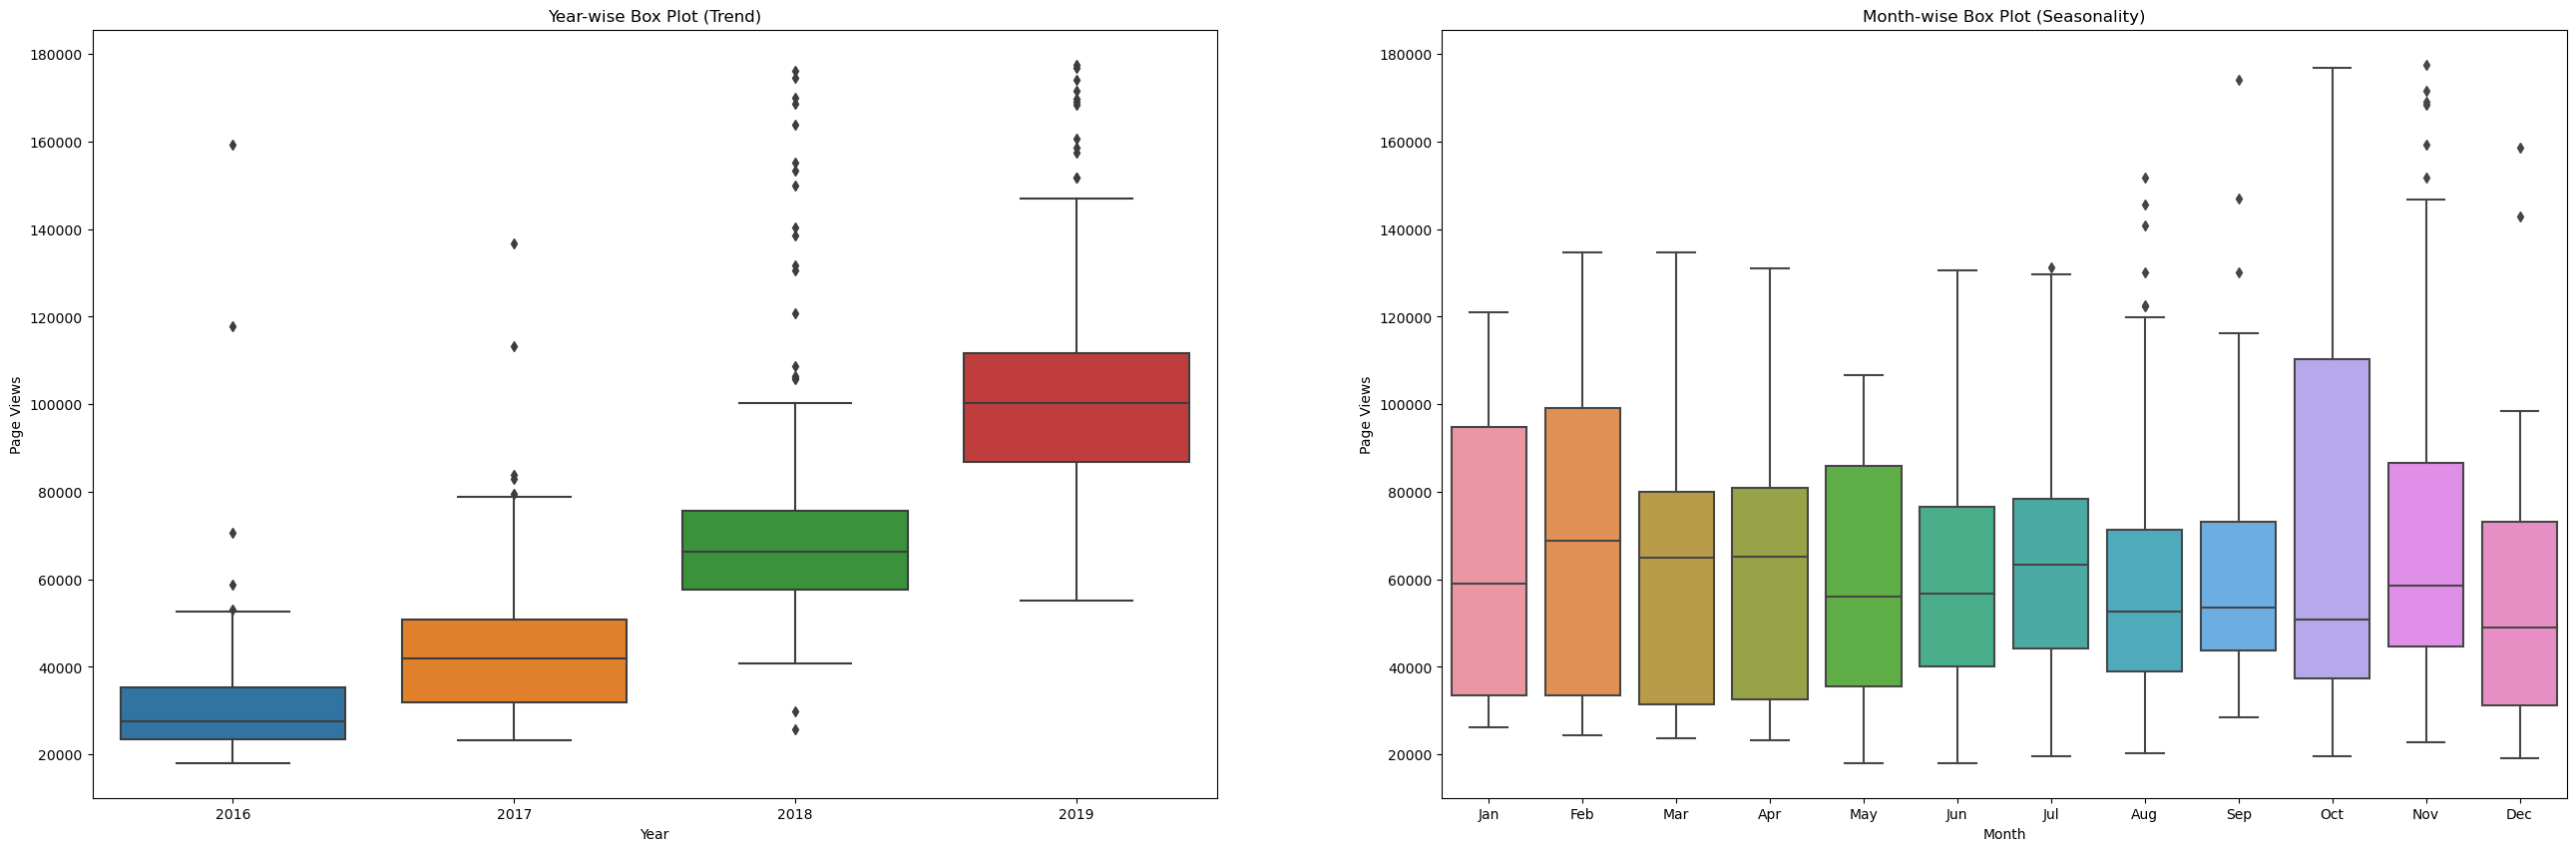

In [9]:
fig,ax = plt.subplots(1,2,figsize = (32,10),dpi = 100)

sns.boxplot(df_box,x='Year',y='value',ax = ax[0])
ax[0].set_ylabel('Page Views')
ax[0].set_title('Year-wise Box Plot (Trend)')

month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
sns.boxplot(df_box,x='Month',y='value',ax =ax[1],order = month_order)
ax[1].set_title('Month-wise Box Plot (Seasonality)')
ax[1].set_ylabel('Page Views')

plt.show()